## Title :
Exercise: Beta Values for Data using Bootstrapping

## Description :
Solve the previous exercise by building your own bootstrap function.

## Data Description:

## Instructions:

- Define a function `bootstrap` that takes a dataframe as the input. Use NumPy's `random.randint()` function to generate random integers in the range of the length of the dataset. These integers will be used as the indices to access the rows of the dataset.
- Similar to the previous exercise, compute the $\beta_0$ and $\beta_1$ values for each instance of the dataframe.
- Plot the $\beta_0$, $\beta_1$ histograms.

## Hints: 
To compute the beta values use the following equations:

- $\beta_{0}=\bar{y}-\left(b_{1} * \bar{x}\right)$
- $\beta_{1}=\frac{\sum(x-\bar{x}) *(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

where $\bar{x}$ is the mean of $x$ and $\bar{y}$ is the mean of $y$

<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html" target="_blank">np.random.randint()</a>
Returns list of integers as per mentioned size 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html" target="_blank">np.dot()</a>
Computes the dot product of two arrays

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" target="_blank">df.iloc[]</a>
Purely integer-location based indexing for selection by position

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a>
Plots a histogram

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html" target="_blank">ax.set_xlabel()</a>
Sets label for x-axthe is

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html" target="_blank">ax.set_ylabel()</a>
Sets label for the y-axis

**Note:** This exercise is auto-graded and you can try multiple attempts. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline


In [2]:
# Read the file "Advertising_csv"
df = pd.read_csv('data/Advertising_adj.csv')

# Take a quick look at the data
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [3]:
# Define a bootstrap function, which takes as input a dataframe 
# It must output a bootstrapped version of the input dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(0, df.shape[0], size = df.__len__())
    new_df = df.iloc[selectionIndex]
    return new_df


#### **Alternate approach to $\beta$ computation**

![linear_algebra](fig/linear_algebra.jpeg)



In [4]:
# Initialize two empty lists to store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 1000

# Loop through the number of bootstraps
for i in range(number_of_bootstraps):

    # Call the bootstrap function to get a bootstrapped version of the data
    df_new = bootstrap(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.tv.mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new.sales.mean()

    #'X' is the predictor variable given by df_new.tv values 
    X = df_new.tv
    
    #'y' is the reponse variable given by df_new.sales values
    y = df_new.sales
    
    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta1)
    beta1_list.append(beta0)


In [5]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)


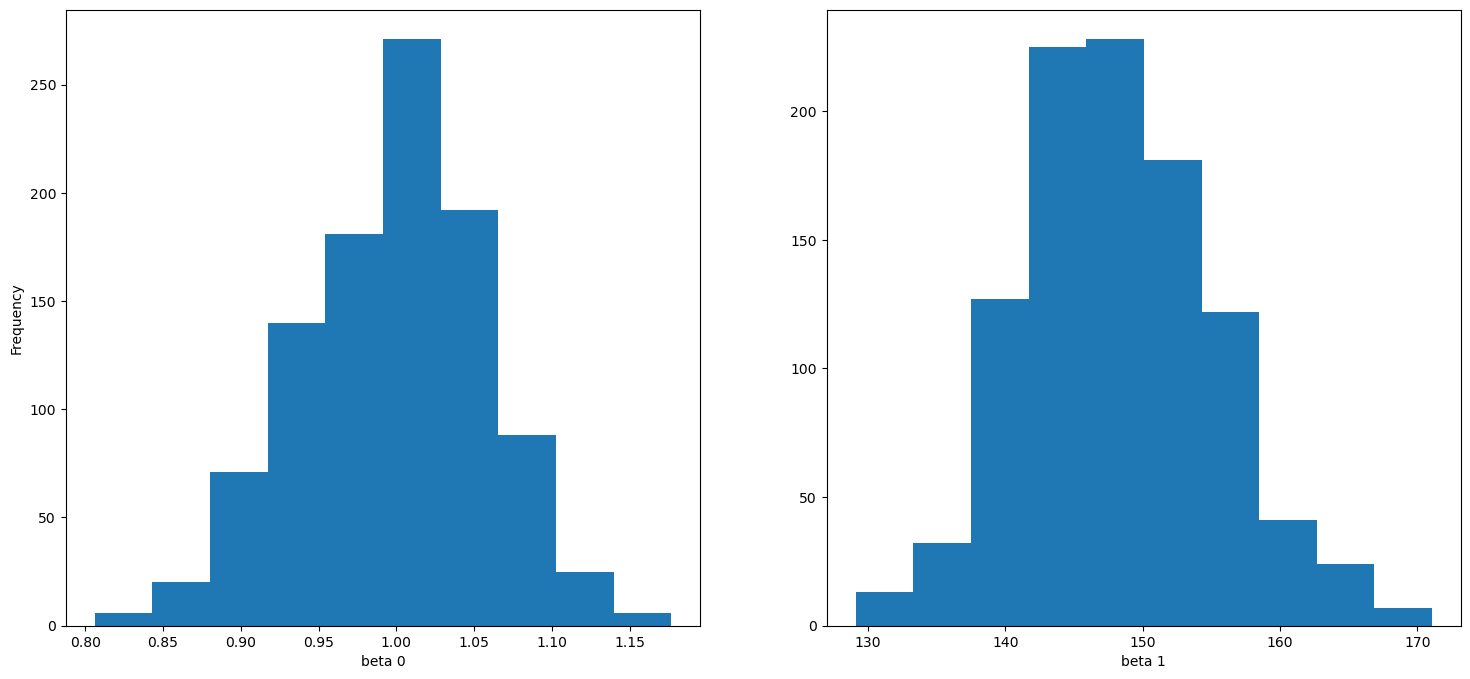

In [6]:
# Plot histograms of beta_0 and beta_1 using lists created above 

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('beta 0')
ax[1].set_xlabel('beta 1')
ax[0].set_ylabel('Frequency')
plt.show();


### Compare the plots with the results from the RandomUniverse() function

In [7]:
# Helper code to visualise the similarity between the bootstrap
# function here & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 1000

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

    # Using linear algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)


In [8]:
# Helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')
    plt.show();


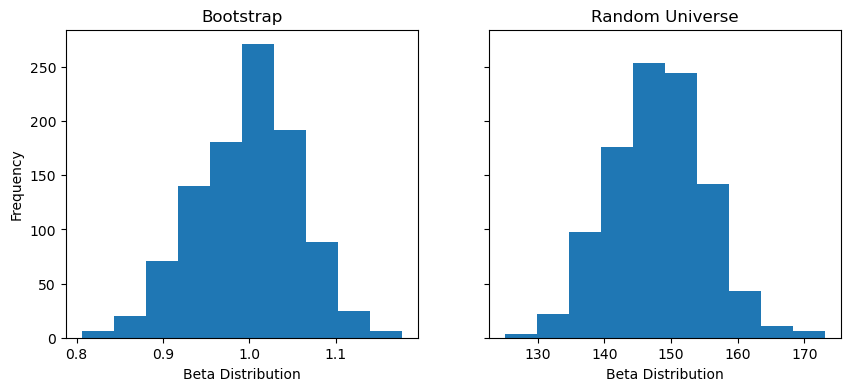

In [9]:
# Call the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)


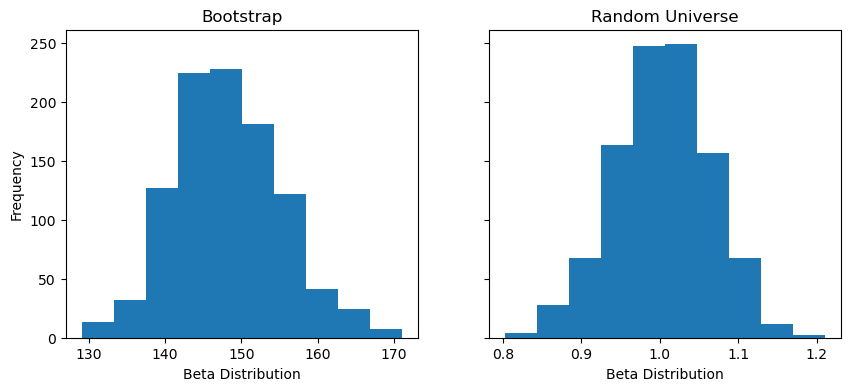

In [10]:
# Call the 'plotmulti' function above to compare the two histograms for beta1
plotmulti(beta1_list, beta1_randUni)
